In [284]:
import os
import numpy as np 
from matplotlib import pyplot 
import pandas as pd

In [285]:
data=pd.read_csv("house_prices_data_training_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6414100026,20150108T000000,320000.0,2,1.00,1802,11225,1.0,0,0,...,7,1802,0,1961,0,98125,47.7205,-122.323,1810,7332
17995,1346300035,20140626T000000,1990000.0,5,3.00,4480,5000,2.5,0,0,...,12,3420,1060,1902,0,98112,47.6275,-122.315,3220,5600
17996,2212210360,20140702T000000,253000.0,2,1.00,1310,7128,1.0,0,0,...,7,940,370,1980,0,98031,47.3958,-122.189,1400,7161
17997,205000410,20140915T000000,630000.0,3,2.50,2320,32772,2.0,0,0,...,9,2320,0,1992,0,98053,47.6304,-121.988,2610,33305


In [286]:
#data normalization
col =data.columns[3:]
print(col)


norm_data = (data[col]-(data[col]).mean())/(data[col]).std()
print(norm_data)
data[col] = norm_data


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -0.388600  -1.399361    -0.965747 -0.238104 -0.849901   -0.088855   
1     -0.388600   0.248341     0.574003 -0.200605  1.112180   -0.088855   
2     -1.459226  -1.399361    -1.419918 -0.135643 -0.849901   -0.088855   
3      0.682027   1.236962    -0.101715 -0.253414 -0.849901   -0.088855   
4     -0.388600  -0.081200    -0.411880 -0.180867 -0.849901   -0.088855   
...         ...        ...          ...       ...       ...         ...   
17994 -1.459226  -1.399361    -0.276737 -0.106789 -0.849901   -0.088855   
17995  1.752654   1.236962     2.689774 -0.253414  2.093221   -0.088855   
17996 -1.459226  -1.399361    -0.821741 -0.203291 -0

In [287]:
train, validate, test = \
             np.split(data.sample(frac=1, random_state=42), 
                     [int(.6*len(data)), int(.8*len(data))])
#train, validate , test = np.split(data.sample(frac=1),[int(.6*len(data)),int(.8*len(data))])

In [288]:
train = train.to_numpy()
train

array([[8927600070, '20150113T000000', 630000.0, ...,
        -0.4519948762856752, -0.3167571217512534, -0.23223802119535736],
       [3526059115, '20150421T000000', 515000.0, ..., 0.61890525169214,
        0.9013296182292431, -0.09429773334994337],
       [6163901382, '20140515T000000', 400000.0, ...,
        -0.7322975943470935, -0.7326891793055693, -0.1742906699536449],
       ...,
       [7694800270, '20150420T000000', 636000.0, ..., 0.6045307533299531,
        0.7973466038406641, -0.38659367857233534],
       [3225069065, '20140624T000000', 3080000.0, ..., 0.992642209107058,
        3.82770873745068, 0.2276116847467622],
       [5014000100, '20140924T000000', 537000.0, ...,
        -1.2929030304696238, -1.0297835061300806, -0.2511394600546415]],
      dtype=object)

In [289]:
validate=validate.to_numpy()
validate

array([[3834000520, '20140730T000000', 275000.0, ...,
        -0.5454291156394813, -0.985219357106404, -0.21688288711237994],
       [7215400280, '20150116T000000', 345000.0, ..., 0.992642209107058,
        0.47054284433370164, 0.8409396118325467],
       [269000030, '20140825T000000', 976000.0, ..., -1.256966784564361,
        1.3766805411484613, -0.20481813890432624],
       ...,
       [1066100260, '20140620T000000', 681500.0, ..., 0.7985864812185567,
        1.317261675783559, -0.057847569824399314],
       [8073000495, '20141010T000000', 700000.0, ...,
        -0.23637740085389347, -0.6881250302818926, -0.005859473000604277],
       [1138010510, '20141212T000000', 415000.0, ...,
        0.015176320483151158, -0.8218174773529227, -0.2176140839734741]],
      dtype=object)

In [290]:
test=test.to_numpy()
test

array([[7457000005, '20140926T000000', 1220000.0, ...,
        -1.2929030304696238, -0.6138514485757648, -0.25709871447255894],
       [1036450170, '20150312T000000', 660000.0, ..., 0.2379810450959242,
        0.1288843684855136, -0.35921035612435886],
       [3623059101, '20140811T000000', 420000.0, ..., 0.7985864812185567,
        0.4259786953100249, 1.1925356224896753],
       ...,
       [7202350480, '20140930T000000', 575000.0, ..., 1.3160684222547308,
        -0.4207401361398324, -0.3887141494695084],
       [1723049033, '20140620T000000', 245000.0, ...,
        -0.7754210894333478, -1.193185385883562, 0.0627999122561377],
       [6147650280, '20150325T000000', 315000.0, ..., 0.8345227271239217,
        1.554937137243168, -0.2663483547654001]], dtype=object)

In [291]:
train_x = train[:,[3,4]]
train_x

array([[-0.38859959644900627, -0.4107400093231568],
       [1.7526537745859434, 1.2369620116734323],
       [-0.38859959644900627, -1.3993612219211102],
       ...,
       [-0.38859959644900627, 0.5778812032747966],
       [0.6820270890684685, 3.873285245267975],
       [0.6820270890684685, -0.08119960512383899]], dtype=object)

In [292]:
train_y =train[:,2]
train_y

array([630000.0, 515000.0, 400000.0, ..., 636000.0, 3080000.0, 537000.0],
      dtype=object)

In [293]:
train_m =train_y.size
train_m


train_x = np.concatenate([np.ones((train_m,1)), train_x], axis =1)
train_x

array([[1.0, -0.38859959644900627, -0.4107400093231568],
       [1.0, 1.7526537745859434, 1.2369620116734323],
       [1.0, -0.38859959644900627, -1.3993612219211102],
       ...,
       [1.0, -0.38859959644900627, 0.5778812032747966],
       [1.0, 0.6820270890684685, 3.873285245267975],
       [1.0, 0.6820270890684685, -0.08119960512383899]], dtype=object)

In [312]:

def computeCostMulti(x, y, theta):
    #intialize some useful values 
    train_m = train_y.shape[0] #number of training examples 
    
    #you need to return the following variable correctly 
    
    j=0
    #==============your code here =============
    
    j=0
    #h = np.dot(X, theta)
    #J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))    
    
    j=np.dot((np.dot(train_x,theta)-train_y),(np.dot(train_x,theta)-train_y))/(2*train_m) 
    
    #=====================================================
    
    return j

In [313]:
def gradientDescentMulti(x,y, theta, alpha, num_iters):
    
    #Intialize some useful values
    
    train_m = train_y.shape[0] #number of trainig examples 
    
    #make a copy of theta, which will be updated by gradient descent 
    
    theta = theta.copy()
    j_history= []
    for i in range(num_iters):
        #==================YOUR CODE IS HERE =================
        sumofh0x=np.dot(train_x,theta)
        theta =theta-((alpha/train_m)*(np.dot(train_x.T,sumofh0x- train_y)))
        #=======================================
        
        #save the cost j in every iteration
        
        j_history.append(computeCostMulti(train_x, train_y, theta))
    return theta, j_history

Text(0, 0.5, 'Cost j')

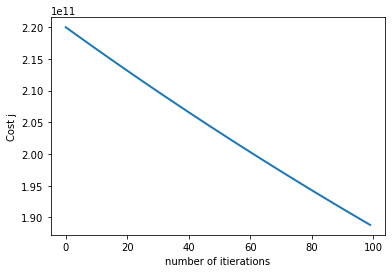

In [314]:
# choose some alpha value - change this 
alpha = 0.001
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(train_x, train_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

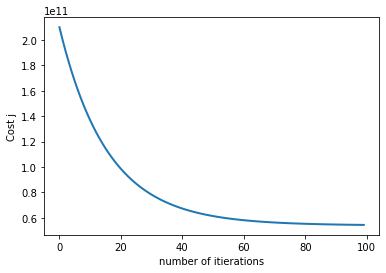

In [315]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(train_x, train_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

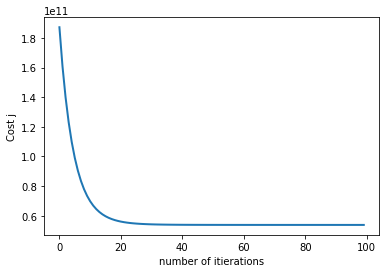

In [316]:
# choose some alpha value - change this 
alpha = 0.1
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(train_x, train_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

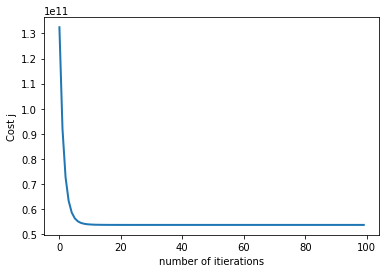

In [317]:
# choose some alpha value - change this 
alpha = 0.3
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(train_x, train_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

In [319]:
validate_x = validate[:,[3,4]]
validate_x
validate_y =validate[:,2]
validate_y
validate_m =validate_y.size
validate_m
validate_x = np.concatenate([np.ones((validate_m,1)), validate_x], axis =1)
validate_x

array([[1.0, -0.38859959644900627, -1.3993612219211102],
       [1.0, -0.38859959644900627, 0.24834079907547882],
       [1.0, 0.6820270890684685, -0.7402804135224746],
       ...,
       [1.0, 1.7526537745859434, 0.9074216074741145],
       [1.0, -1.4592262819664812, -1.3993612219211102],
       [1.0, -0.38859959644900627, -0.7402804135224746]], dtype=object)

Text(0, 0.5, 'Cost j')

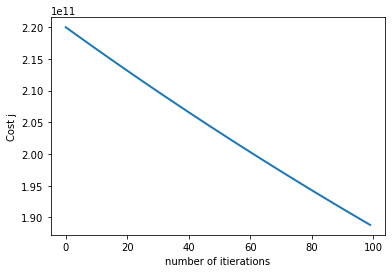

In [321]:
alpha = 0.001
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(validate_x, validate_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

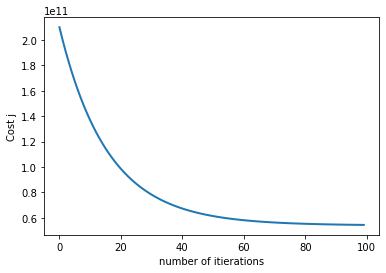

In [322]:
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(validate_x, validate_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

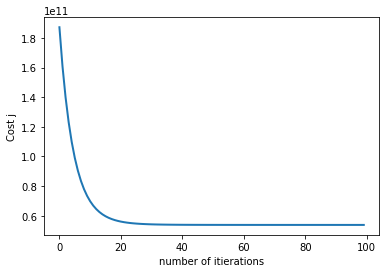

In [323]:
alpha = 0.1
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(validate_x, validate_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

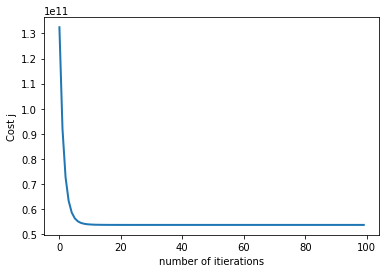

In [324]:
alpha = 0.3
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(validate_x, validate_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

In [329]:
test_x = test[:,[3,4]]
test_x
test_y =test[:,2]
test_y
test_m =test_y.size
test_m
test_x = np.concatenate([np.ones((test_m,1)), test_x], axis =1)
test_x

array([[1.0, 0.6820270890684685, -0.08119960512383899],
       [1.0, -0.38859959644900627, 1.8960428200720678],
       [1.0, -0.38859959644900627, 1.2369620116734323],
       ...,
       [1.0, -0.38859959644900627, 0.5778812032747966],
       [1.0, -2.529852967483956, -1.728901626120428],
       [1.0, 0.6820270890684685, 0.5778812032747966]], dtype=object)

Text(0, 0.5, 'Cost j')

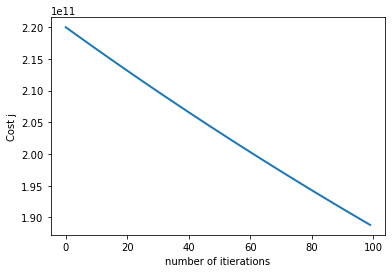

In [330]:
alpha = 0.001
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(test_x, test_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

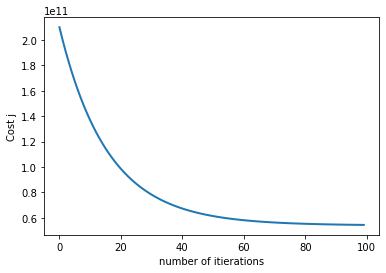

In [331]:
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(test_x, test_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

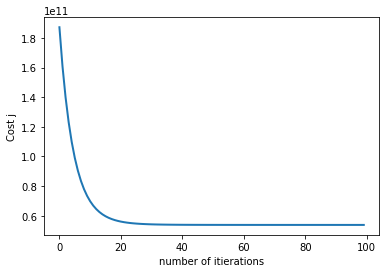

In [333]:
alpha = 0.1
num_iters = 100
#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(test_x, test_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'Cost j')

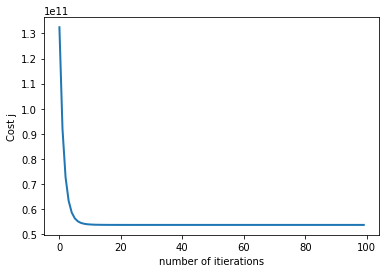

In [334]:
alpha = 0.3

num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(test_x, test_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')